# C3.AI Covid Challenge
## _Data Science Project 
### Author: 

##### Team BUK
    - Vrisha Parekh (https://www.linkedin.com/in/vrisha-parekh-72a630131/)
    - Sreetam Dev (https://www.linkedin.com/in/sreetam-dev-b76530143/)

### Dataset

This is a C3.AI Covid-19 Challenge Outbreak location datafile. John Hopkins dataset consists of the projections of the COVID-19 cases from Jan-Nov11, 2020. 

### Associated tasks
=========================================

Analyse and generate insights from the COVID-19 John Hopkins dataset by fetching the dataset from the C3.AI COVID-19 datalake.



### Table of Contents


- **1.  Loading libraries**

- **2.  Exploring the data**

    - *2.1  Setting DateTimeIndex*
    
- **3.Exploratory Data Analysis**
   
- **4.Loading the data from Covid-19 Data Hub**
    - 4.1 Setting DateTime index
    - 4.2. Creating subsets for national and state level data

- **5. Defining Metrics**
    - 5.1. caseFatalityRate
    - 5.2. crudeMortalityRate
    - 5.3. positiveTestRate

#### 1.Loading Libraries

In [1]:
#Importing Libraries
import requests
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import gamma
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
plt.style.use('ggplot')

In [2]:
#Importing the C3.AI datalake
import c3aidatalake


#### 2. Exploring the data

JHU DailyReports data

In [3]:
#Fetching the data from the C3.AI Covid-19 datalake.
# Total number of confirmed cases, deaths, and recoveries from John Hopkins University data(can use only evalmetrics)
today = pd.Timestamp.now().strftime("%Y-%m-%d")

cases_JHU = c3aidatalake.evalmetrics(
    "outbreaklocation",
    {
        "spec" : {
            "ids" : ["Australia"],
            "expressions" : ["JHU_ConfirmedCases", "JHU_ConfirmedDeaths", "JHU_ConfirmedRecoveries"],
            "start" : "2020-01-01",
            "end" : today,
            "interval" : "DAY",
        }
    }
)

cases_JHU

,dates,Australia.JHU_ConfirmedCases.data,Australia.JHU_ConfirmedCases.missing,Australia.JHU_ConfirmedDeaths.data,Australia.JHU_ConfirmedDeaths.missing,Australia.JHU_ConfirmedRecoveries.data,Australia.JHU_ConfirmedRecoveries.missing
0,2020-01-01,0,100,0,100,0,100
0,2020-01-02,0,100,0,100,0,100
0,2020-01-03,0,100,0,100,0,100
0,2020-01-04,0,100,0,100,0,100
0,2020-01-05,0,100,0,100,0,100
...,...,...,...,...,...,...,...
0,2020-11-13,27682,0,907,0,0,100
0,2020-11-14,27711,0,907,0,0,100
0,2020-11-15,27749,0,907,0,0,100
0,2020-11-16,27754,0,907,0,0,100


In [4]:
#Shape of the data
print('The shape of data is-',cases_JHU.shape)

The shape of data is- (322, 7)


In [5]:
#Finding missing values.

cases_JHU.isnull().any()


dates                                        False
Australia.JHU_ConfirmedCases.data            False
Australia.JHU_ConfirmedCases.missing         False
Australia.JHU_ConfirmedDeaths.data           False
Australia.JHU_ConfirmedDeaths.missing        False
Australia.JHU_ConfirmedRecoveries.data       False
Australia.JHU_ConfirmedRecoveries.missing    False
dtype: bool

There are no nulls in the dataframe.

In [6]:
#exploring the stats of the dataset
cases_JHU.describe()

,dates,Australia.JHU_ConfirmedCases.data,Australia.JHU_ConfirmedCases.missing,Australia.JHU_ConfirmedDeaths.data,Australia.JHU_ConfirmedDeaths.missing,Australia.JHU_ConfirmedRecoveries.data,Australia.JHU_ConfirmedRecoveries.missing
count,322,322.0,322.0,322.0,322.0,322.0,322.0
unique,322,264.0,2.0,137.0,2.0,1.0,1.0
top,2020-03-13 00:00:00,0.0,0.0,0.0,0.0,0.0,100.0
freq,1,25.0,301.0,60.0,301.0,322.0,322.0
first,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-11-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Knowing the percentage of the data available and not.
#ConfirmedCases.missing=0
print('Available data',(len(cases_JHU[cases_JHU['Australia.JHU_ConfirmedCases.missing']==0])/len(cases_JHU))*100)

#ConfirmedCases.missing=100
print('Not-available data',(len(cases_JHU[cases_JHU['Australia.JHU_ConfirmedCases.missing']==100])/len(cases_JHU))*100)

Available data 93.47826086956522
Not-available data 6.521739130434782


In [8]:
#Finding duplicate records
cases_JHU.duplicated()

0    False
0    False
0    False
0    False
0    False
     ...  
0    False
0    False
0    False
0    False
0    False
Length: 322, dtype: bool

In [9]:
#Making a deep copy
cases_JHUCopy= cases_JHU.copy()


In [10]:
#Dropping the non-required rows.
cases_JHUCopy.drop(['Australia.JHU_ConfirmedCases.missing','Australia.JHU_ConfirmedDeaths.missing',
                    'Australia.JHU_ConfirmedRecoveries.missing','Australia.JHU_ConfirmedRecoveries.data'],inplace=True,axis=1)

In [11]:
#Observing the datatypes of each feature.
cases_JHUCopy.dtypes


dates                                 datetime64[ns]
Australia.JHU_ConfirmedCases.data             object
Australia.JHU_ConfirmedDeaths.data            object
dtype: object

In [12]:
#Converting object dtype to numeric
cases_JHUCopy[['Australia.JHU_ConfirmedCases.data','Australia.JHU_ConfirmedDeaths.data']]=cases_JHUCopy[['Australia.JHU_ConfirmedCases.data','Australia.JHU_ConfirmedDeaths.data']].apply(pd.to_numeric)


#### 2.1 Setting DateTimeIndex

In [13]:
#setting date as the index
cases_JHUCopy=cases_JHUCopy.set_index('dates')


In [14]:
#Adding the year, month and day name features.
cases_JHUCopy['Year']= cases_JHUCopy.index.year
cases_JHUCopy['Month']= cases_JHUCopy.index.month
cases_JHUCopy['Weekday_name']= cases_JHUCopy.index.day_name()


#### 3. Exploratory Data Analysis

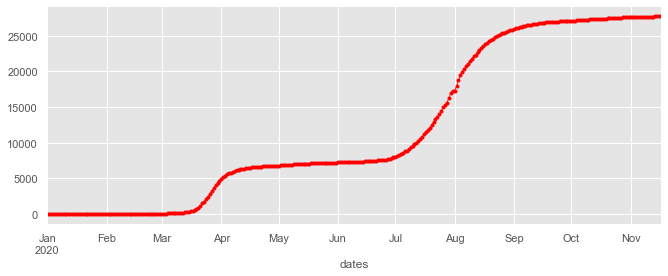

In [15]:
#Plotting the confirmed cases
cases_JHUCopy['Australia.JHU_ConfirmedCases.data'].plot(marker='.',linewidth=0.8,color='red')
plt.show()


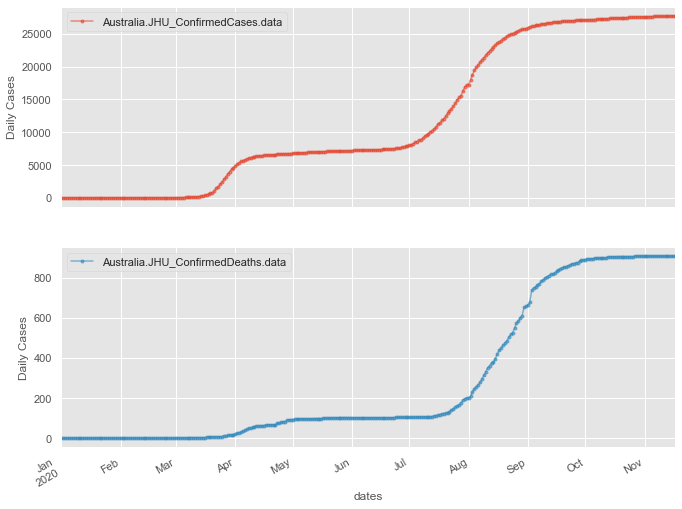

In [16]:
#Plotting confirmed and death cases.
cols_list=['Australia.JHU_ConfirmedCases.data','Australia.JHU_ConfirmedDeaths.data']

axes= cases_JHUCopy[cols_list].plot(marker='.',alpha=0.6,figsize=(11, 9),subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Cases')
plt.show()


Here it is observed that the cases started to grow in Australia near the end of March and peaked in september.

Death cases seem to move along with the trend of the confirmed cases.

#### 4. Loading the COVID-19 datahub datatset 

#### Exploring the Data

In [17]:
#Reading covid-19 data hub file, https://www.covid19data.com.au/
dataHubCases= pd.read_csv('COVID19_Data_Hub.csv')
dataHubCases.head()

,date,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,population,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,id,state_abbrev
0,2020-01-25,4,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
1,2020-01-26,4,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
2,2020-01-27,5,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
3,2020-01-28,5,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
4,2020-01-29,9,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN


In [18]:
print('Shape of the data is',dataHubCases.shape)

Shape of the data is (2664, 16)


In [19]:
#Observing the stats.
dataHubCases.describe()

,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,population,administrative_area_level,administrative_area_level_3
count,2664.000000,2664.000000,2.664000e+03,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2.664000e+03,2664.000000,0.0
mean,2849.397147,67.932432,7.291222e+05,2849.004505,2300.730480,28.815315,4.001502,2.125375,5.657660e+06,1.888889,NaN
std,6229.615122,196.118426,1.563953e+06,6229.794438,5336.304698,100.406513,11.178106,6.351458,7.504464e+06,0.314329,NaN
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2.455620e+05,1.000000,NaN
25%,33.000000,0.000000,1.105525e+04,33.000000,29.000000,0.000000,0.000000,0.000000,5.355000e+05,2.000000,NaN
50%,440.000000,6.000000,9.451950e+04,440.000000,319.500000,0.000000,0.000000,0.000000,2.630557e+06,2.000000,NaN
75%,1410.250000,15.000000,5.262708e+05,1410.250000,1163.000000,10.000000,1.000000,0.000000,6.629870e+06,2.000000,NaN
max,27728.000000,907.000000,9.379339e+06,27728.000000,25125.000000,694.000000,96.000000,46.000000,2.545947e+07,2.000000,NaN


In [20]:
#Evaluating the dtypes of different columns
dataHubCases.dtypes

date                            object
confirmed                        int64
deaths                           int64
tests                            int64
positives                        int64
recovered                        int64
hosp                             int64
icu                              int64
vent                             int64
population                       int64
administrative_area_level        int64
administrative_area_level_1     object
administrative_area_level_2     object
administrative_area_level_3    float64
id                              object
state_abbrev                    object
dtype: object

In [21]:
#Renaming the columns
dataHubCases.columns= ['dates','confirmed', 'deaths', 'tests', 'positives', 'recovered', 'hosp', 'icu',
       'vent', 'population', 'administrative_area_level',
       'administrative_area_level_1', 'administrative_area_level_2',
       'administrative_area_level_3', 'id', 'state_abbrev']

In [22]:
#Checking fir nulls.
dataHubCases.isnull().any()

dates                          False
confirmed                      False
deaths                         False
tests                          False
positives                      False
recovered                      False
hosp                           False
icu                            False
vent                           False
population                     False
administrative_area_level      False
administrative_area_level_1    False
administrative_area_level_2     True
administrative_area_level_3     True
id                             False
state_abbrev                    True
dtype: bool

In [23]:
#Finding duplicate records
print('Duplicate records=',dataHubCases.duplicated())
dataHubCases.drop_duplicates()

Duplicate records= 0       False
1       False
2       False
3       False
4       False
        ...  
2659    False
2660    False
2661    False
2662    False
2663    False
Length: 2664, dtype: bool


,dates,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,population,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,id,state_abbrev
0,2020-01-25,4,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
1,2020-01-26,4,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
2,2020-01-27,5,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
3,2020-01-28,5,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
4,2020-01-29,9,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,2020-11-15,1185,6,1292903,1185,1171,6,0,0,5115451,2,Australia,Queensland,NaN,36068882,QLD
2660,2020-11-15,526,4,589008,526,503,1,0,0,1756494,2,Australia,South Australia,NaN,165128d0,SA
2661,2020-11-15,230,13,122974,230,217,0,0,0,535500,2,Australia,Tasmania,NaN,86525f8e,TAS
2662,2020-11-15,20345,819,3398653,20345,19523,2,0,0,6629870,2,Australia,Victoria,NaN,6c5dccdb,VIC


In [24]:
#Converting date to datetime
dataHubCases['dates']= dataHubCases['dates'].apply(pd.to_datetime)

#### 4.1 Setting to index to dateTimeIndex.

In [25]:

dataHubCases= dataHubCases.set_index('dates')

#### 4.2 Creating subsets for national and state level data

In [26]:

dataHubCasesNational=dataHubCases[dataHubCases['administrative_area_level']==1]
dataHubCasesState=dataHubCases[dataHubCases['administrative_area_level']==2]

https://www.datacamp.com/community/tutorials/joining-dataframes-pandas

In [27]:
#Merging both the dataframes
dataHubCasesNational= pd.merge(cases_JHUCopy,dataHubCasesNational,how='inner',left_index=True, right_index=True)
dataHubCasesNational

,Australia.JHU_ConfirmedCases.data,Australia.JHU_ConfirmedDeaths.data,Year,Month,Weekday_name,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,population,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,id,state_abbrev
dates,,,,,,,,,,,,,,,,,,,,
2020-01-25,0.0,0.0,2020,1,Saturday,4,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
2020-01-26,4.0,0.0,2020,1,Sunday,4,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
2020-01-27,5.0,0.0,2020,1,Monday,5,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
2020-01-28,5.0,0.0,2020,1,Tuesday,5,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
2020-01-29,6.0,0.0,2020,1,Wednesday,9,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-11,27675.0,907.0,2020,11,Wednesday,27685,907,9212619,27685,25103,22,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
2020-11-12,27676.0,907.0,2020,11,Thursday,27698,907,9268481,27698,25108,22,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
2020-11-13,27682.0,907.0,2020,11,Friday,27703,907,9308474,27703,25114,22,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN


In [28]:
dataHubCasesNational = dataHubCasesNational.asfreq('d')

In [29]:
#Finding duplicate records
print('Number of Duplicate records=',dataHubCasesNational.duplicated().sum())

Number of Duplicate records= 7


In [30]:
#Dropping duplicate records
dataHubCasesNational.drop_duplicates(inplace=True)

In [31]:
#Dropping unneccesary columns.
dataHubCasesNational.drop(['confirmed','deaths','administrative_area_level','administrative_area_level_1',
                          'administrative_area_level_2','administrative_area_level_3','id','state_abbrev'],inplace=True,axis=1)

In [32]:
#Renaming columns
dataHubCasesNational.columns=['confirmedCases','deaths', 'Year', 'Month', 'Weekday_name',
'tests', 'positives', 'recovered', 'hosp', 'icu', 'vent', 'population']

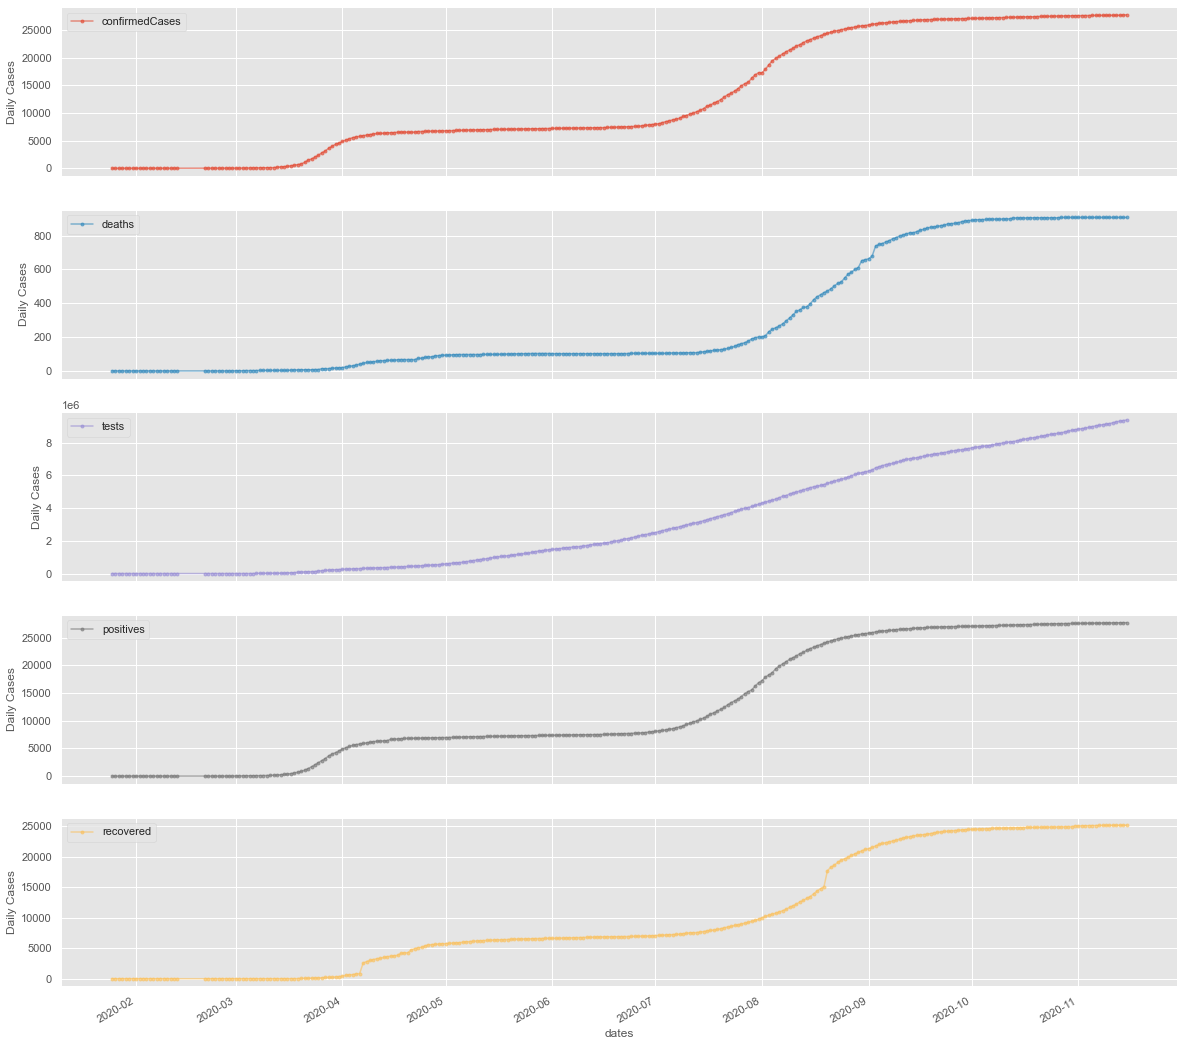

In [33]:
cols_list=['confirmedCases','deaths','tests','positives','recovered']

axes= dataHubCasesNational[cols_list].plot(marker='.',alpha=0.6,figsize=(20, 20),subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Cases')
plt.show()

From the above graphs it is observed that deaths, no. of tests, no.recoveries follow the similar trend to confirmed cases. They may be highly correalated to each other.

In [34]:
#Defining list of column names.
col_list=['confirmedCases', 'deaths','tests',
       'positives', 'recovered', 'hosp', 'icu', 'vent']

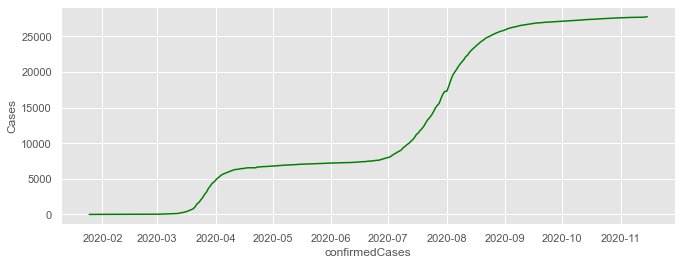

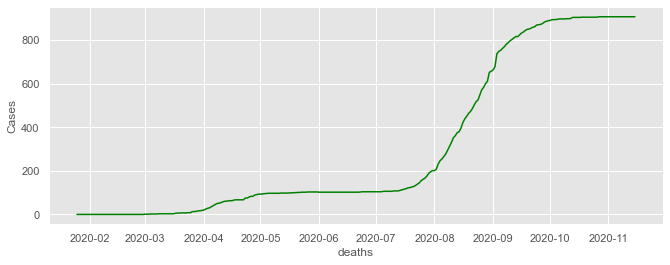

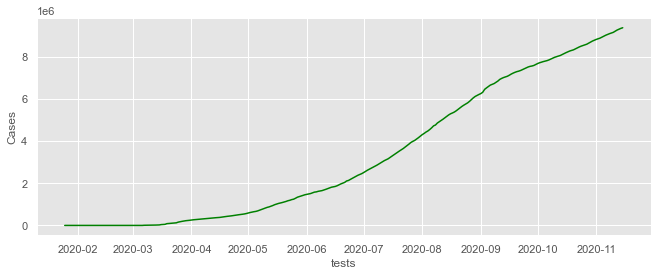

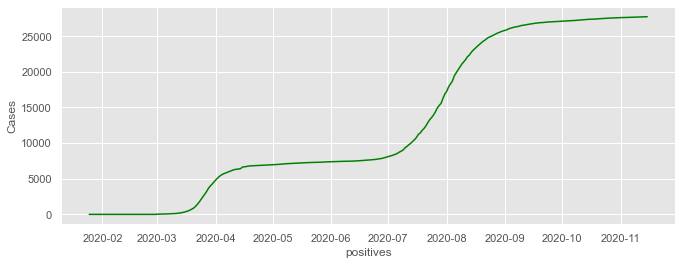

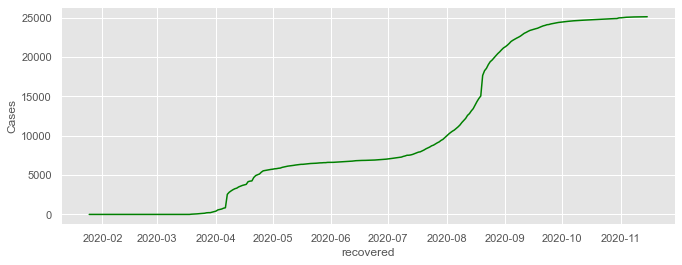

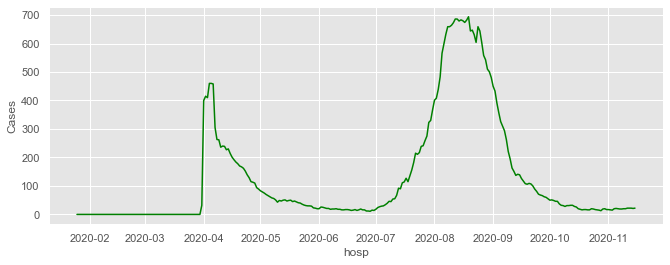

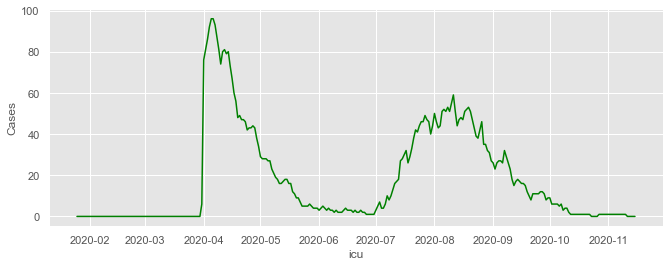

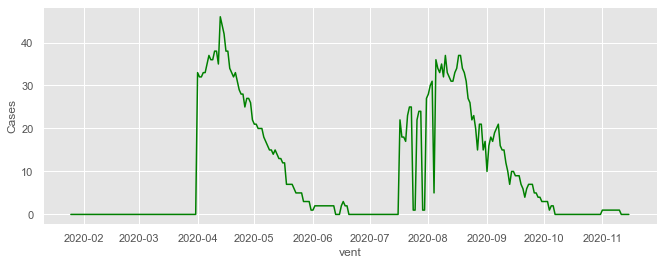

In [35]:
# Plotting the data

for each in col_list:
    plt.plot(dataHubCasesNational[each],color='green')
    plt.xlabel(each)
    plt.ylabel('Cases')
    plt.show()

#### 5. Defining Metrics

**5.1. caseFatalityRate- This metric is associated with the risk of death from COVID-19. It is the ratio of the total number of deaths and the total number of confirmedCases of COVID-19.**

In [36]:
#Adding the metric
#caseFatalityRate
dataHubCasesNational['cfr']= (dataHubCasesNational['deaths']/dataHubCasesNational['confirmedCases'])*100


**5.2.crudeMortalityRate- This metric is linked with the question of the probability of death for an infected person. It is the ratio of the total number of deaths and the total population.**

In [37]:

#crudeMortalityRate
dataHubCasesNational['cmr']=(dataHubCasesNational['deaths']/dataHubCasesNational['population'])*100


**5.3.positiveTestRate- This is the ratio of the total no of positive cases to the total number of tests conducted.**

In [38]:
#positveTestRate
dataHubCasesNational['positiveRateTest']=(dataHubCasesNational['positives']/dataHubCasesNational['tests'])*100


In [39]:
dataHubCasesNational.dropna(how='all',inplace=True)

In [40]:
#Filtering dataframe and removing na's
dataHubCasesNational=dataHubCasesNational[dataHubCasesNational['confirmedCases'].notnull()]

In [41]:
# Uncomment the line below to export the DataFrame as a .csv file
dataHubCasesNational.to_csv("NationalAusCases.csv")